Note: you may need to restart the kernel to use updated packages.
         Date     Price  Volume  Price change  Volume change
0  2024-04-04  2,449.00     0.0          0.82            NaN
1  2024-04-03  2,429.00     0.0          2.06            NaN


/var/folders/gk/lwvxlf616ggf8j4h0y1hjl6c0000gn/T/ipykernel_90744/1671314584.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return_df = return_df.merge(brent[['Date', 'Price change']], on='Date', how='left', suffixes=('_brent'))
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date                      0
Price change              0
Price change_cofee        0
Price change_copper       0
Price change_corn         0
Price change_cotton       0
Price change_gasoline     0
Price change_gold         0
Price change_nickel       0
Price change_palladium    0
Price change_silver       0
Price change_soybean      0
Price change_wheat        0
Price change_wti          0
Price change_zinc         0
Price change_cocoa        0
dtype: int64
Date             0
brent_log        0
cocoa_log        0
cofee_log        0
copper_log       0
corn_log         0
cotton_log       0
gasoline_log     0
gold_log         0
nickel_log       0
palladium_log    0
silver_log       0
soybean_log      0
wheat_log        0
wti_log          0
zinc_log         0
dtype: int64
Fitting GJR-GARCH model for brent_log
Best parameters for brent_log: p=1, o=1, q=1
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                    brent_log   R-square

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best parameters for cocoa_log: p=1, o=0, q=1
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    cocoa_log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7530.89
Distribution:      Standardized Student's t   AIC:                           15071.8
Method:                  Maximum Likelihood   BIC:                           15103.1
                                              No. Observations:                 3864
Date:                      Tue, Apr 23 2024   Df Residuals:                     3863
Time:                              12:20:31   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

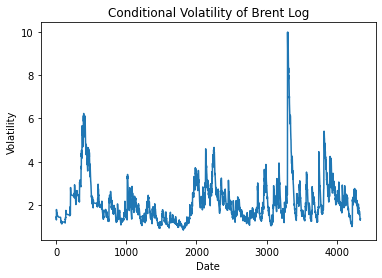

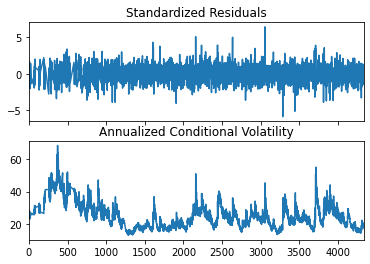

In [2]:
%run "/Users/nickarhi/Desktop/Studying/Project HSE 4th course/Codes/Volatility.ipynb"

1. K-MEANS

In [3]:
volatilities = {}

for commodity, model in best_models.items():
    volatilities[commodity] = model.conditional_volatility

volatility_df = pd.DataFrame(volatilities)
print(volatility_df.head())

   brent_log  cocoa_log  cofee_log  copper_log  corn_log  cotton_log  \
0   1.449971   1.583020   1.832224    1.694749  2.150980    1.696608   
1   1.435268   1.561643   2.062589    1.642173  2.093257    1.633911   
2   1.442929   1.561031   2.045212    1.647629  2.006791    1.621557   
3   1.395760   1.555597   2.027745    1.623038  1.956851    2.010457   
4   1.360467   1.535933   1.998337    1.641168  1.930230    1.556504   

   gasoline_log  gold_log  nickel_log  palladium_log  silver_log  soybean_log  \
0      3.429627  1.013784    3.338787       2.743124    1.568978     1.407807   
1      3.365278  1.048336    3.348469       2.613345    1.622440     1.416620   
2      3.345079  1.030368    3.308727       2.545324    1.555523     1.382199   
3      3.345589  1.013228    3.076399       2.582950    1.560335     1.401482   
4      3.300274  0.996074    3.077881       2.467970    1.527784     1.374253   

   wheat_log   wti_log  zinc_log  
0   2.454408  1.574095  1.709206  
1   2.3894

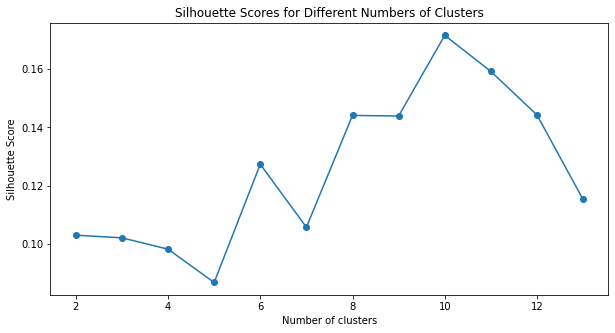

Best number of clusters based on silhouette score: 10


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(volatility_df)
data_transposed = data_scaled.T

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 14):  
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(data_transposed)
    score = silhouette_score(data_transposed, kmeans.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(10, 5))
plt.plot(range(2, 14), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


best_num_clusters = range(2, 14)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters based on silhouette score: {best_num_clusters}")

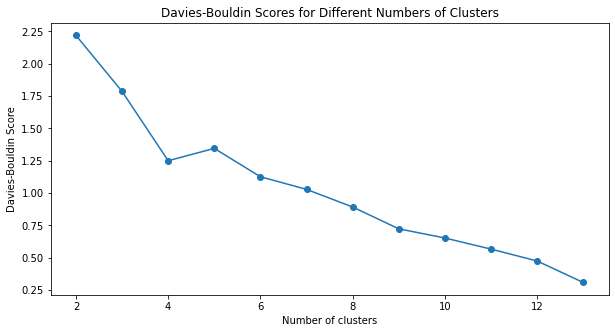

Best number of clusters based on Davies-Bouldin score: 13


In [45]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for i in range(2, 14):  
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(data_transposed)
    score = davies_bouldin_score(data_transposed, kmeans.labels_)
    davies_bouldin_scores.append(score)


plt.figure(figsize=(10, 5))
plt.plot(range(2, 14), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()


best_num_clusters = range(2, 14)[davies_bouldin_scores.index(min(davies_bouldin_scores))]
print(f"Best number of clusters based on Davies-Bouldin score: {best_num_clusters}")

In [39]:
from sklearn.cluster import KMeans

data_transposed = data_scaled.T
kmeans = KMeans(n_clusters=8, random_state=0)
commodity_labels = kmeans.fit_predict(data_transposed)
labels = kmeans.labels_

data_clusters = volatility_df.T  
data_clusters['Cluster'] = commodity_labels

'''data_clusters = data_clusters.T
'''
centroids = kmeans.cluster_centers_


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


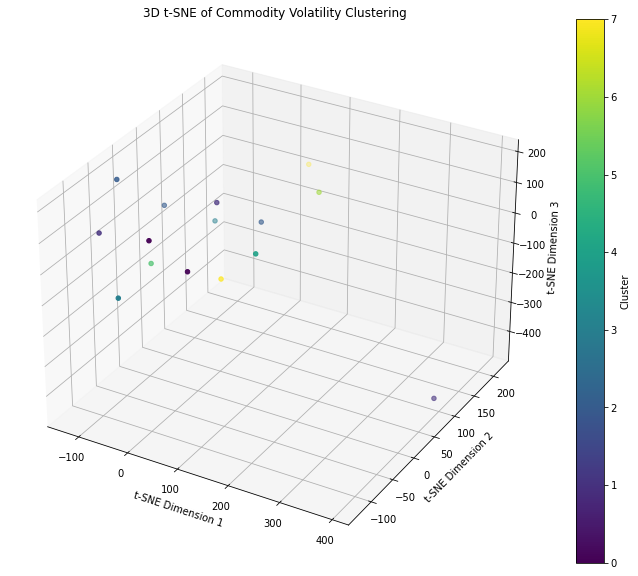

In [40]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


tsne = TSNE(n_components=3, perplexity=14, n_iter=600, random_state=0)
data_tsne_3d = tsne.fit_transform(data_transposed)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2], c=labels, cmap='viridis')

fig.colorbar(sc, label='Cluster')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('3D t-SNE of Commodity Volatility Clustering')

plt.show()


In [41]:
data_clusters

,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,Cluster
brent_log,1.449971,1.435268,1.442929,1.395760,1.360467,1.318629,1.796919,1.754364,1.735118,1.706710,...,1.461287,1.449971,1.420193,1.374357,1.381832,1.338149,1.303610,1.369460,1.367780,2
cocoa_log,1.583020,1.561643,1.561031,1.555597,1.535933,1.541171,1.536445,1.523200,1.503265,1.483284,...,2.773640,2.740935,2.741038,2.715162,2.678732,2.750936,3.135768,3.088803,3.344373,1
cofee_log,1.832224,2.062589,2.045212,2.027745,1.998337,1.971952,1.958063,1.933467,1.919335,1.904889,...,2.058712,2.034363,2.005020,2.018963,2.041881,2.037006,2.010566,1.997145,1.968728,5
copper_log,1.694749,1.642173,1.647629,1.623038,1.641168,1.599841,1.885610,1.806170,1.760787,1.763825,...,0.990643,0.983230,0.980843,0.989472,0.998427,0.983699,0.962721,1.123580,1.046062,1
corn_log,2.150980,2.093257,2.006791,1.956851,1.930230,1.864373,2.009302,1.858657,2.213731,1.863394,...,1.283189,1.321780,1.240936,1.324436,1.357648,1.266797,1.278903,1.229441,1.255417,7
cotton_log,1.696608,1.633911,1.621557,2.010457,1.556504,1.701566,1.513484,1.664774,1.603181,1.636393,...,1.657643,1.835011,1.591595,1.721491,2.269800,1.609766,1.841781,1.526678,1.864809,4
gasoline_log,3.429627,3.365278,3.345079,3.345589,3.300274,2.306105,2.312292,2.745155,2.429902,2.288742,...,2.710790,5.840395,9.559880,2.930185,2.629734,3.393487,2.903663,2.457773,2.738058,6
gold_log,1.013784,1.048336,1.030368,1.013228,0.996074,1.006429,1.056968,1.077445,1.069577,1.051022,...,0.903845,0.902734,0.903198,0.891511,0.899453,0.885668,0.888685,0.886022,0.877829,0
nickel_log,3.338787,3.348469,3.308727,3.076399,3.077881,3.002029,3.172864,2.752424,3.192701,3.176227,...,1.295201,1.304037,1.256620,1.267089,1.222130,1.212680,1.174799,1.166792,1.135059,3
palladium_log,2.743124,2.613345,2.545324,2.582950,2.467970,2.390969,2.372870,2.301886,2.229748,2.199205,...,2.596560,2.749215,3.493868,2.900703,2.727954,2.993923,2.787265,2.648020,2.683962,2


2. Hierarchical Agglomerative Clustering

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


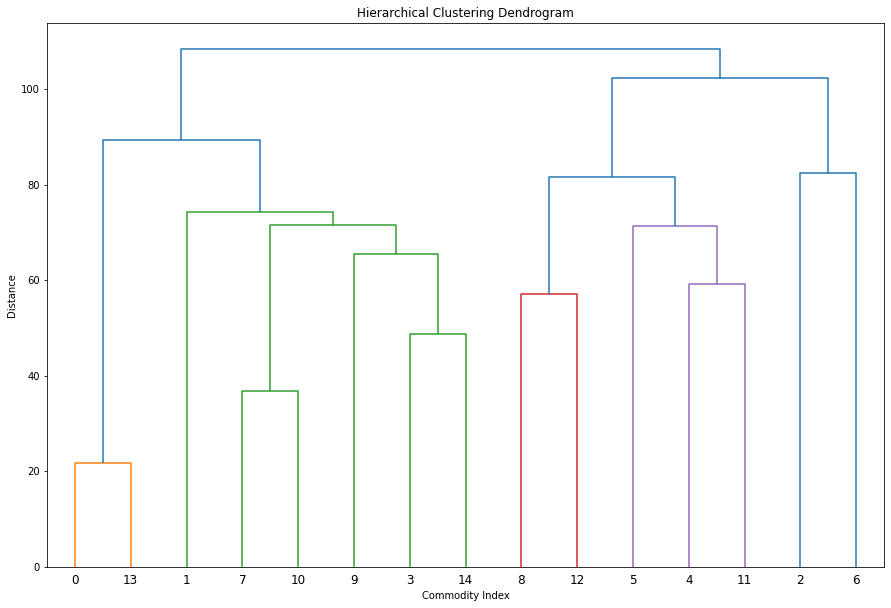

In [35]:
linkage_matrix = linkage(data_transposed, method='ward')
plt.figure(figsize=(15, 10))


dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Commodity Index')
plt.ylabel('Distance')
plt.show()

In [36]:

num_clusters = 7
hac = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
commodity_labels_hac = hac.fit_predict(data_transposed)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


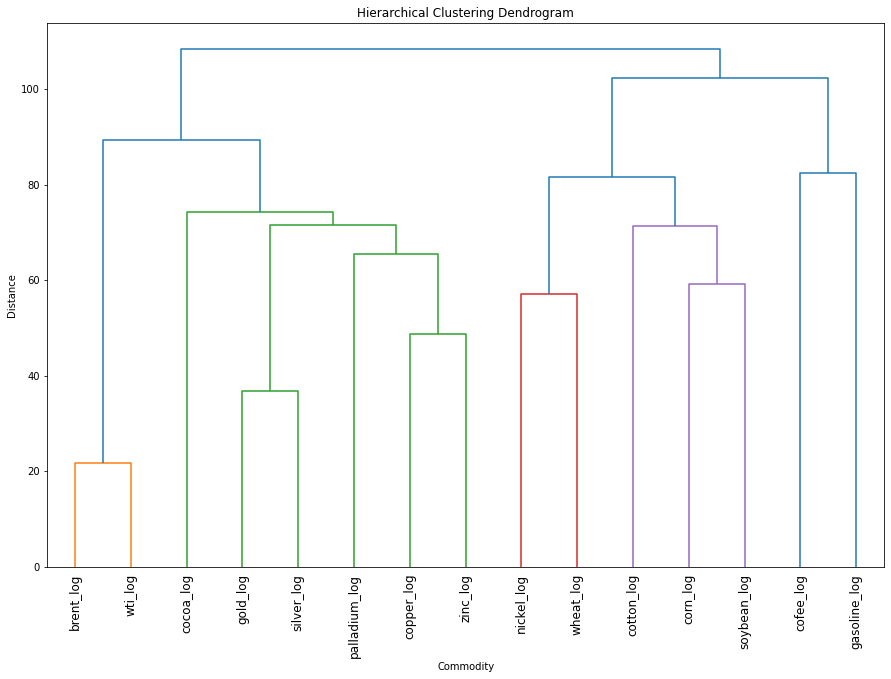

In [37]:

commodity_names = list(volatility_df.columns)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=commodity_names, leaf_rotation=90, leaf_font_size=12)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Commodity')
plt.ylabel('Distance')
plt.show()
